In [1]:
import numpy as np
import h5py
import time
import pandas as pd
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
from py_files.basic_functions import getting_2D_data_from_h5_filtered_np_xy_switched_without_intensity_filter, getting_2D_data_from_h5_including_points_without_lasing

In [2]:
class layer: 
    main_name = 'Parameterentwicklung'
    h5_path = '/home/jan/Documents/IWU/Parameterentwicklung.h5'
    
    def __init__(self, number, part):
        self.number = number 
        self.part = part
        
    def array(self):
        return getting_2D_data_from_h5_filtered_np_xy_switched_without_intensity_filter(self.h5_path, self.main_name, self.part, 'Slice'+str("{:05}".format(self.number)))
    
    def array_wo_lasing(self):
        return getting_2D_data_from_h5_including_points_without_lasing(self.h5_path, self.main_name, self.part, 'Slice'+str("{:05}".format(self.number)))

In [3]:
layer_1 = layer(3, "W60_H100")
array = layer_1.array()

array_wo_lasing = layer_1.array_wo_lasing()

#layer_2 = layer(3, "W60_H101")
#array_2 = layer_2.array()

#array_wo_lasing_2 = layer_2.array_wo_lasing()

#layer_3 = layer(3, "W60_H102")
#array_3 = layer_3.array()

#array_wo_lasing_3 = layer_3.array_wo_lasing()

#layer_4 = layer(3, "W60_H103")
#array_4 = layer_4.array()

#array_wo_lasing_4 = layer_4.array_wo_lasing()

#layer_5 = layer(3, "W60_H104")
#array_5 = layer_5.array()

#array_wo_lasing_5 = layer_5.array_wo_lasing()

#layer_6 = layer(3, "W60_H105")
#array_6 = layer_6.array()

#array_wo_lasing_6 = layer_6.array_wo_lasing()

In [4]:
df_vector_info_1 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
#df_vector_info_2 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
#df_vector_info_3 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
#df_vector_info_4 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
#df_vector_info_5 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
#df_vector_info_6 = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])

In [5]:
array = array_wo_lasing
df = df_vector_info_1

for i in tqdm(range(len(array)-1)):
    x_diff = array[i+1][0]-array[i][0]
    y_diff = array[i+1][1]-array[i][1]
    length = np.sqrt(x_diff*x_diff + y_diff*y_diff)
    angle = 180/np.pi * np.arctan(y_diff/x_diff)
    df = df.append(
        {'number': i, 'x': array[i][0], 'y': array[i][1], 'x_end': array[i+1][0], 'y_end': array[i+1][1], 'x_diff': x_diff, 'y_diff':y_diff, 'length':length, 'angle':angle}, ignore_index=True)
    
df['sab'] = ''
df['len'] = ''
df['sab-1'] = ''
df['len-1'] = ''
df['sab+1'] = ''
df['len+1'] = ''
df['status'] = ''


df_vector_info_1 = df

  3%|▎         | 894/29470 [00:00<00:19, 1475.91it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
100%|██████████| 29470/29470 [00:21<00:00, 1391.52it/s]


In [6]:
df_vector_info_1

,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status
0,0.0,13160.0,-2850.0,13143.0,-2877.0,-17.0,-27.0,31.906112,57.804266,,,,,,,
1,1.0,13143.0,-2877.0,13131.0,-2895.0,-12.0,-18.0,21.633308,56.309932,,,,,,,
2,2.0,13131.0,-2895.0,13115.0,-2922.0,-16.0,-27.0,31.384710,59.349332,,,,,,,
3,3.0,13115.0,-2922.0,13103.0,-2940.0,-12.0,-18.0,21.633308,56.309932,,,,,,,
4,4.0,13103.0,-2940.0,13086.0,-2967.0,-17.0,-27.0,31.906112,57.804266,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,29465.0,8252.0,-17127.0,8365.0,-17014.0,113.0,113.0,159.806133,45.000000,,,,,,,
29466,29466.0,8365.0,-17014.0,8377.0,-17038.0,12.0,-24.0,26.832816,-63.434949,,,,,,,
29467,29467.0,8377.0,-17038.0,8319.0,-17096.0,-58.0,-58.0,82.024387,45.000000,,,,,,,
29468,29468.0,8319.0,-17096.0,8386.0,-17064.0,67.0,32.0,74.249579,25.529698,,,,,,,


In [11]:
# changed version 

ref_angle = 0
diff_angle = 8
ref_length = 13
sab_old = True
len_crit_old = False

for index,row in tqdm(df_vector_info_1.iterrows()):
    #print(row['angle'])
    sab = (row['angle'] < (ref_angle + diff_angle) and row['angle'] > (ref_angle - diff_angle))
    len_crit = row['length'] > ref_length # len_crit becomes True if the vector is longer than the reference one
        
    df_vector_info_1['sab'][index] = sab
    df_vector_info_1['len'][index] = len_crit
    df_vector_info_1['sab-1'][index] = sab_old
    df_vector_info_1['len-1'][index] = len_crit_old  
    
    sab_old = sab
    len_crit_old = len_crit
    ref_angle = row['angle']
    
    # jetzt muss noch unterschieden werden zwischen das erste Mal anders und das letzte 

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [12]:
for index,row in tqdm(df_vector_info_1.iterrows()):
       
    try:
        df_vector_info_1['sab+1'][index] = df_vector_info_1['sab'][index+1]
        df_vector_info_1['len+1'][index] = df_vector_info_1['len'][index+1]
    except:
        print("problem in row " + str(index) + "detected")

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
29470it [00:24, 1185.08it/s]

problem in row 29469detected


In [13]:
for index,row in tqdm(df_vector_info_1.iterrows()):
    sab = df_vector_info_1['sab'][index]
    length = df_vector_info_1['len'][index]
    sab_p = df_vector_info_1['sab+1'][index]
    length_p = df_vector_info_1['len+1'][index]
    sab_m = df_vector_info_1['sab-1'][index]
    length_m = df_vector_info_1['len-1'][index]
    
    # for a description of the different cases see truth table in scratchbook from Jan 
    if(
       (sab == 0 and length == 0 and sab_m == 0 and length_m == 0 and sab_p == 1 and length_p ==0) or
       (sab == 0 and length == 0 and sab_m == 0 and length_m == 1 and sab_p == 1 and length_p ==0) or
       #(sab == 0 and length == 0 and sab_m == 1 and length_m == 0 and sab_p == 1 and length_p ==0) or
       (sab == 0 and length == 0 and sab_m == 1 and length_m == 0 and sab_p == 0 and length_p ==0) or 
       (sab == 0 and length == 0 and sab_m == 1 and length_m == 1 and sab_p == 1 and length_p ==0)):
        
        status = "scan"
        
    elif((sab == 0 and length == 0 and sab_m == 0 and length_m == 1 and sab_p == 0 and length_p ==0) or
       (sab == 0 and length == 0 and sab_m == 1 and length_m == 0 and sab_p == 0 and length_p == 1) or
       (sab == 0 and length == 1 and sab_m == 0 and length_m == 0 and sab_p == 0 and length_p == 0) or
       (sab == 0 and length == 1 and sab_m == 0 and length_m == 1 and sab_p == 0 and length_p == 0) or
       (sab == 0 and length == 1 and sab_m == 0 and length_m == 1 and sab_p == 1 and length_p == 1) or
       (sab == 0 and length == 1 and sab_m == 1 and length_m == 0 and sab_p == 0 and length_p == 1) or
       (sab == 0 and length == 1 and sab_m == 1 and length_m == 0 and sab_p == 1 and length_p == 1) or
       (sab == 0 and length == 1 and sab_m == 1 and length_m == 1 and sab_p == 0 and length_p == 1) or
       (sab == 0 and length == 1 and sab_m == 1 and length_m == 0 and sab_p == 0 and length_p == 0) ):
        
        status = "jump"
    
    else:
        status = "nd"
        
    #print(status)   
    df_vector_info_1['status'][index] = status

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
29470it [00:14, 2006.83it/s]


In [14]:
df_vector_info_1.head()

,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status
0,0.0,13160.0,-2850.0,13143.0,-2877.0,-17.0,-27.0,31.906112,57.804266,False,True,True,False,True,True,jump
1,1.0,13143.0,-2877.0,13131.0,-2895.0,-12.0,-18.0,21.633308,56.309932,True,True,False,True,True,True,nd
2,2.0,13131.0,-2895.0,13115.0,-2922.0,-16.0,-27.0,31.384710,59.349332,True,True,True,True,True,True,nd
3,3.0,13115.0,-2922.0,13103.0,-2940.0,-12.0,-18.0,21.633308,56.309932,True,True,True,True,True,True,nd
4,4.0,13103.0,-2940.0,13086.0,-2967.0,-17.0,-27.0,31.906112,57.804266,True,True,True,True,True,True,nd


In [ ]:
0 1 1 1 1 1 

In [16]:
start = 0
end = start + 20

df_vector_info_1[start:end]

,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status
0,0.0,13160.0,-2850.0,13143.0,-2877.0,-17.0,-27.0,31.906112,57.804266,False,True,True,False,True,True,jump
1,1.0,13143.0,-2877.0,13131.0,-2895.0,-12.0,-18.0,21.633308,56.309932,True,True,False,True,True,True,nd
2,2.0,13131.0,-2895.0,13115.0,-2922.0,-16.0,-27.0,31.384710,59.349332,True,True,True,True,True,True,nd
3,3.0,13115.0,-2922.0,13103.0,-2940.0,-12.0,-18.0,21.633308,56.309932,True,True,True,True,True,True,nd
4,4.0,13103.0,-2940.0,13086.0,-2967.0,-17.0,-27.0,31.906112,57.804266,True,True,True,True,True,True,nd
5,5.0,13086.0,-2967.0,13075.0,-2985.0,-11.0,-18.0,21.095023,58.570434,True,True,True,True,True,True,nd
6,6.0,13075.0,-2985.0,13058.0,-3012.0,-17.0,-27.0,31.906112,57.804266,True,True,True,True,True,True,nd
7,7.0,13058.0,-3012.0,13047.0,-3031.0,-11.0,-19.0,21.954498,59.931417,True,True,True,True,True,True,nd
8,8.0,13047.0,-3031.0,13030.0,-3058.0,-17.0,-27.0,31.906112,57.804266,True,True,True,True,True,True,nd
9,9.0,13030.0,-3058.0,13019.0,-3076.0,-11.0,-18.0,21.095023,58.570434,True,True,True,True,True,True,nd


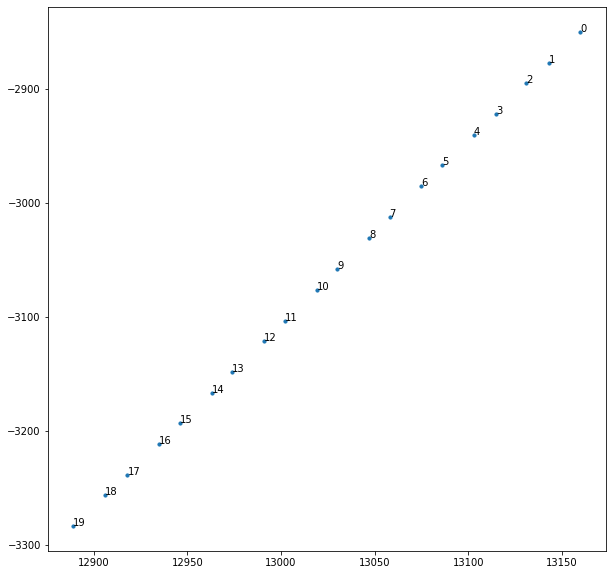

In [17]:
# plots for identifying the error points

fig, ax = plt.subplots(figsize=(10,10))
 
x_pos = df_vector_info_1['x'][start:end]
y_pos = df_vector_info_1['y'][start:end]
n = [int(i) for i in df_vector_info_1.number][start:end]

ax.scatter(x_pos, y_pos, s = 10)

   
for i, txt in enumerate(n):
        ax.annotate(txt, (x_pos[i+start], y_pos[i+start]))

plt.show()

In [18]:
df_ref_points = df_vector_info_1[(df_vector_info_1['status'] != "nd")]

In [19]:
df_ref_points = df_ref_points.reset_index()

In [20]:
df_ref_points

,index,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status
0,0,0.0,13160.0,-2850.0,13143.0,-2877.0,-17.0,-27.0,31.906112,57.804266,False,True,True,False,True,True,jump
1,576,576.0,5056.0,-15817.0,5049.0,-15840.0,-7.0,-23.0,24.041631,73.072487,False,True,True,True,False,True,jump
2,577,577.0,5049.0,-15840.0,5078.0,-15826.0,29.0,14.0,32.202484,25.769328,False,True,False,True,True,True,jump
3,580,580.0,5102.0,-15818.0,5097.0,-15823.0,-5.0,-5.0,7.071068,45.000000,False,False,False,False,True,False,scan
4,587,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,True,True,False,False,False,jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,29201,29201.0,8373.0,-17030.0,8372.0,-17043.0,-1.0,-13.0,13.038405,85.601295,False,True,False,True,False,False,jump
365,29202,29202.0,8372.0,-17043.0,8367.0,-17048.0,-5.0,-5.0,7.071068,45.000000,False,False,False,True,True,False,scan
366,29210,29210.0,8321.0,-17093.0,8329.0,-17091.0,8.0,2.0,8.246211,14.036243,False,False,True,False,False,True,jump
367,29213,29213.0,8376.0,-17069.0,5040.0,-15844.0,-3336.0,1225.0,3553.803737,-20.163550,False,True,True,True,False,True,jump


In [21]:
df_scan = df_ref_points[(df_ref_points['status'] == "scan")]

In [22]:
df_scan = df_scan.reset_index()

In [23]:
df_jump = df_ref_points[(df_ref_points['status'] == "jump")]
df_jump = df_jump.reset_index()

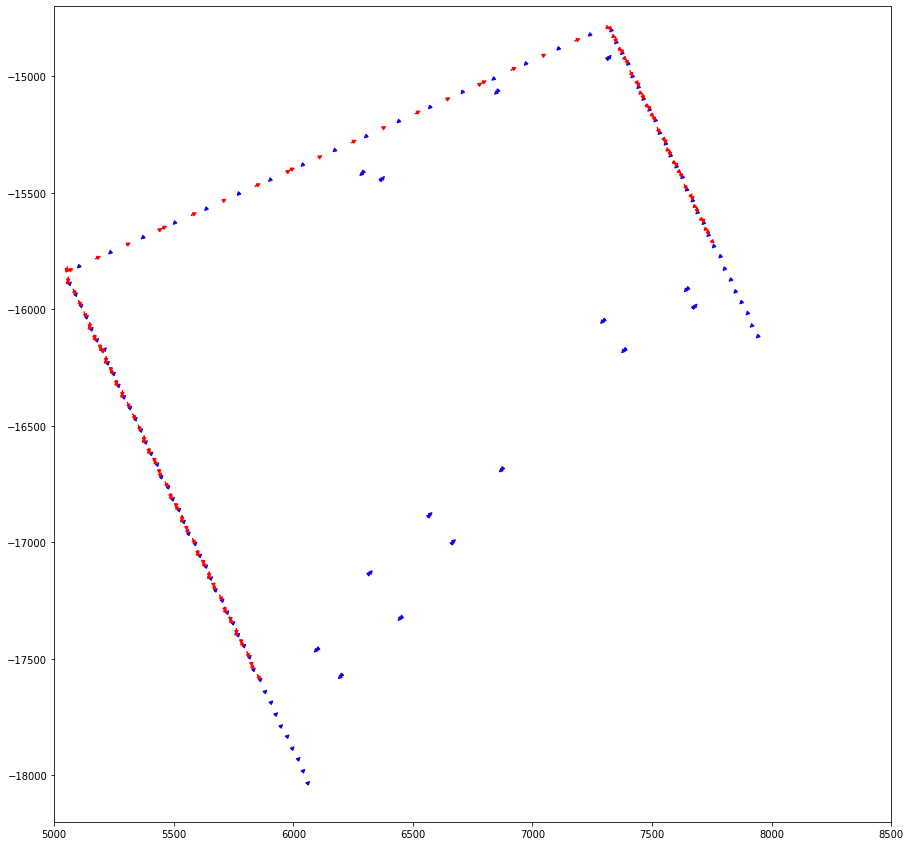

In [24]:
fig, ax = plt.subplots(figsize=(15,15))

for i in range(120):    #(len(df_turn)):   
    x_pos = df_scan['x'][i]
    y_pos = df_scan['y'][i]
    x_direct = df_scan['x_diff'][i]
    y_direct = df_scan['y_diff'][i]
    
    x_pos2 = df_jump['x'][i]
    y_pos2 = df_jump['y'][i]
    x_direct2 = df_jump['x_diff'][i]
    y_direct2 = df_jump['y_diff'][i]

    ax.arrow(x_pos,y_pos,x_direct,y_direct, head_width= 15, head_length= 15, fc='r', ec='b',length_includes_head = True)
    ax.arrow(x_pos2,y_pos2,x_direct2,y_direct2, head_width= 15, head_length= 15, fc='r', ec='r',length_includes_head = True)
    ax.axis([5000, 8500, -18200, -14700])
    
    
    #ax.scatter(x_pos,y_pos, s = 10)   
        
plt.show()

In [240]:
df_ref_points.head(20)

,index,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status,speed
0,576,576.0,5056.0,-15817.0,5049.0,-15840.0,-7.0,-23.0,24.041631,73.072487,False,True,True,True,False,True,jump,3816
1,577,577.0,5049.0,-15840.0,5078.0,-15826.0,53.0,22.0,57.384667,22.543061,False,True,False,True,True,True,jump,3036
2,580,580.0,5102.0,-15818.0,5097.0,-15823.0,-43.0,-43.0,60.811183,45.000000,False,False,False,False,True,False,scan,1378
3,587,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,True,True,False,False,False,jump,3812
4,588,588.0,5058.0,-15885.0,5067.0,-15888.0,9.0,-3.0,9.486833,-18.434949,False,False,False,True,False,False,jump,1505
5,589,589.0,5067.0,-15888.0,5072.0,-15883.0,104.0,104.0,147.078210,45.000000,False,False,False,False,True,False,scan,1373
6,606,606.0,5171.0,-15784.0,5193.0,-15773.0,64.0,28.0,69.856997,23.629378,False,True,True,False,True,True,jump,3696
7,609,609.0,5235.0,-15756.0,5228.0,-15763.0,-156.0,-156.0,220.617316,45.000000,False,False,True,True,True,False,scan,1400
8,634,634.0,5079.0,-15912.0,5090.0,-15937.0,11.0,-25.0,27.313001,-66.250506,False,True,True,False,False,False,jump,4335
9,635,635.0,5090.0,-15937.0,5097.0,-15929.0,212.0,213.0,300.521214,45.134813,False,False,False,True,True,False,scan,1402


In [238]:
# Geschwindigkeit hinzufügen zu Dataframe 
# df_ref_points['speed'] = ''

f = 1/40000 # Abtastfrequenz (40 kHz)

for index,row in tqdm(df_ref_points.iterrows()):
    
    try:
        time = (df_ref_points["number"][index+1] - df_ref_points["number"][index])*(1/40000) # in Sekunden
        length = df_ref_points["length"][index]* (1/0.252) * 0.001 # (1/0.252 für Umrechnung Bit in µm und 0.001 für Umrechnung µm in mm ) 

        speed = int(length/time) # in mm/s

        df_ref_points["speed"][index] = speed
        print(speed)
    except:
        print("problem with row " + str(index))

df_ref_points.head(20)

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
368it [00:00, 3033.74it/s]

3816
3036
1378
3812
1505
1373
3696
1400
4335
1402
3070
1412
4259
1394
2641
3196
1403
4190
1401
3696
1401
3809
1505
1397
2788
1396
2965
1346
1399
3765
1402
2069
2698
1016
1398
2730
3175
1399
3809
1505
1398
3070
1401
2069
2776
1396
3717
1398
3118
1239
1401
2808
1399
3809
1505
1397
3717
1406
1016
1401
4259
1399
3052
1402
4259
1400
1016
1399
2730
2007
1399
4335
1400
3717
1417
1016
1400
3809
1505
1398
2788
1398
3118
1239
1399
3744
1400
2069
2776
1398
2428
1937
1400
1753
2730
1399
1505
3809
1400
4259
1401
1016
1403
2776
2069
1399
2965
1346
1400
1239
3118
1399
2087
2913
1400
4259
1400
3809
1505
1399
2730
1595
1401
1595
2730
1399
1356
3812
1400
4190
1400
2776
2069
1399
3118
1239
1401
1346
2965
1399
2069
2776
1400
4335
1400
3809
1505
1399
2730
1753
1400
1753
2603
1399
1505
3650
1400
4259
1399
2698
2227
1399
3118
1463
1401
1346
3118
1398
2244
2698
1400
4259
1400
3650
1505
1398
2603
1774
1399
2069
2776
1400
1356
3809
1399
4335
1400
2776
1595
1405
1016
1401
1595
2730
1399
1505
3809
1400
4190
1405


,index,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,sab,len,sab-1,len-1,sab+1,len+1,status,speed
0,576,576.0,5056.0,-15817.0,5049.0,-15840.0,-7.0,-23.0,24.041631,73.072487,False,True,True,True,False,True,jump,3816
1,577,577.0,5049.0,-15840.0,5078.0,-15826.0,53.0,22.0,57.384667,22.543061,False,True,False,True,True,True,jump,3036
2,580,580.0,5102.0,-15818.0,5097.0,-15823.0,-43.0,-43.0,60.811183,45.000000,False,False,False,False,True,False,scan,1378
3,587,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,True,True,False,False,False,jump,3812
4,588,588.0,5058.0,-15885.0,5067.0,-15888.0,9.0,-3.0,9.486833,-18.434949,False,False,False,True,False,False,jump,1505
5,589,589.0,5067.0,-15888.0,5072.0,-15883.0,104.0,104.0,147.078210,45.000000,False,False,False,False,True,False,scan,1373
6,606,606.0,5171.0,-15784.0,5193.0,-15773.0,64.0,28.0,69.856997,23.629378,False,True,True,False,True,True,jump,3696
7,609,609.0,5235.0,-15756.0,5228.0,-15763.0,-156.0,-156.0,220.617316,45.000000,False,False,True,True,True,False,scan,1400
8,634,634.0,5079.0,-15912.0,5090.0,-15937.0,11.0,-25.0,27.313001,-66.250506,False,True,True,False,False,False,jump,4335
9,635,635.0,5090.0,-15937.0,5097.0,-15929.0,212.0,213.0,300.521214,45.134813,False,False,False,True,True,False,scan,1402


In [213]:
for index,row in tqdm(df_ref_points.iterrows()):
    if index < (len(df_ref_points)-1):
        x_diff = df_ref_points['x'][index+1] - df_ref_points['x'][index]
        y_diff = df_ref_points['y'][index+1] - df_ref_points['y'][index]
        length = np.sqrt(x_diff*x_diff + y_diff*y_diff)
        angle = 180/np.pi * np.arctan(y_diff/x_diff)
        
        df_ref_points['x_diff'][index] = x_diff
        df_ref_points['y_diff'][index]= y_diff
        df_ref_points['length'][index] = length
        df_ref_points['angle'][index]  = angle     

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [194]:
df_jumps = df_ref_points.loc[(df_ref_points['status'] == "start jump") | (df_ref_points['status'] == "direction change jump")]       #[(df_ref_points['status'] == "direction change jump")]

df_writing = df_ref_points.loc[(df_ref_points['status'] == "start writing after short jump") | (df_ref_points['status'] == "start writing after long jump")|(df_ref_points['status'] == "test corner ")]

In [195]:
df_jumps = df_jumps.reset_index()

In [196]:
df_writing = df_writing.reset_index()

In [197]:
df_jumps

,level_0,index,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,same_as_before,len_crit,same_as_before_old,len_crit_old,status
0,0,0,0.0,13160.0,-2850.0,13143.0,-2877.0,-8104.0,-12967.0,15291.105421,57.995808,False,True,True,True,direction change jump
1,1,576,576.0,5056.0,-15817.0,5049.0,-15840.0,41.0,0.0,41.000000,0.000000,False,True,True,True,direction change jump
2,4,587,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,True,True,False,start jump
3,7,606,606.0,5171.0,-15784.0,5193.0,-15773.0,64.0,28.0,69.856997,23.629378,False,True,True,False,start jump
4,9,634,634.0,5079.0,-15912.0,5090.0,-15937.0,11.0,-25.0,27.313001,-66.250506,False,True,True,False,start jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,259,29072,29072.0,8312.0,-16924.0,8327.0,-16932.0,14.0,-22.0,26.076810,-57.528808,False,True,True,False,start jump
91,263,29154,29154.0,8338.0,-16970.0,8349.0,-16994.0,11.0,-24.0,26.400758,-65.376435,False,True,True,False,start jump
92,265,29181,29181.0,8188.0,-17155.0,8204.0,-17149.0,69.0,33.0,76.485293,25.559965,False,True,True,False,start jump
93,267,29200,29200.0,8358.0,-17021.0,8373.0,-17030.0,14.0,-22.0,26.076810,-57.528808,False,True,True,False,start jump


In [198]:
df_writing

,level_0,index,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,same_as_before,len_crit,same_as_before_old,len_crit_old,status
0,2,579,579.0,5097.0,-15817.0,5102.0,-15818.0,5.0,-1.0,5.099020,-11.309932,False,False,True,True,start writing after long jump
1,5,588,588.0,5058.0,-15885.0,5067.0,-15888.0,9.0,-3.0,9.486833,-18.434949,False,False,False,True,start writing after short jump
2,8,609,609.0,5235.0,-15756.0,5228.0,-15763.0,-156.0,-156.0,220.617316,45.000000,False,False,True,True,start writing after long jump
3,10,635,635.0,5090.0,-15937.0,5097.0,-15929.0,212.0,213.0,300.521214,45.134813,False,False,False,True,start writing after short jump
4,12,672,672.0,5364.0,-15693.0,5372.0,-15691.0,8.0,2.0,8.246211,14.036243,False,False,True,True,start writing after long jump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,261,29120,29120.0,8126.0,-17182.0,8131.0,-17177.0,104.0,105.0,147.787009,45.274140,False,False,True,True,start writing after long jump
120,264,29155,29155.0,8349.0,-16994.0,8342.0,-17002.0,-161.0,-161.0,227.688384,45.000000,False,False,False,True,start writing after short jump
121,266,29184,29184.0,8257.0,-17122.0,8265.0,-17114.0,101.0,101.0,142.835570,45.000000,False,False,True,True,start writing after long jump
122,268,29202,29202.0,8372.0,-17043.0,8367.0,-17048.0,4.0,-26.0,26.305893,-81.253838,False,False,False,True,start writing after short jump


In [104]:
ref_angle = 45.0
diff_angle = 15
ref_length = 15
sab_old = True

for index,row in tqdm(df_vector_info.iterrows()):
    #print(row['angle'])
    sab = (row['angle'] < (ref_angle + diff_angle) and row['angle'] > (ref_angle - diff_angle))
    
    if ((sab == False) and (sab_old == True) and (row['length'] > ref_length)):
        status = 'trans_start'
        
    elif ((sab == False) and (sab_old == False) and (old_status == 'trans_start')):
        status = 'scan_start'
    
    elif (((sab == False) and (sab_old == False) and (old_status != 'trans_start')) or (row['length'] > ref_length)):
        status = 'trans'
    
    else:
        status = 'normal'
        
    df_vector_info['same_as_before'][index] = sab
    df_vector_info['status'][index] = status
    
    old_status = status
    sab_old = sab
    ref_angle = row['angle']
    
    # jetzt muss noch unterschieden werden zwischen das erste Mal anders und das letzte 

0it [00:00, ?it/s]/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
58940it [01:42, 572.29it/s]


In [71]:
df_vector_info[(df_vector_info['status'] != "normal")][(df_vector_info['status'] != "trans")]

/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,same_as_before,status
0,0.0,13160.0,-2850.0,13143.0,-2877.0,-17.0,-27.0,31.906112,57.804266,False,trans_start
576,576.0,5056.0,-15817.0,5049.0,-15840.0,-7.0,-23.0,24.041631,73.072487,False,trans_start
577,577.0,5049.0,-15840.0,5078.0,-15826.0,29.0,14.0,32.202484,25.769328,False,scan_start
587,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,trans_start
588,588.0,5058.0,-15885.0,5067.0,-15888.0,9.0,-3.0,9.486833,-18.434949,False,scan_start
...,...,...,...,...,...,...,...,...,...,...,...
29181,29181.0,8188.0,-17155.0,8204.0,-17149.0,16.0,6.0,17.088007,20.556045,False,trans_start
29200,29200.0,8358.0,-17021.0,8373.0,-17030.0,15.0,-9.0,17.492856,-30.963757,False,trans_start
29201,29201.0,8373.0,-17030.0,8372.0,-17043.0,-1.0,-13.0,13.038405,85.601295,False,scan_start
29213,29213.0,8376.0,-17069.0,5040.0,-15844.0,-3336.0,1225.0,3553.803737,-20.163550,False,trans_start


In [72]:
df_non_normal = df_vector_info[(df_vector_info['status'] != "normal")][(df_vector_info['status'] != "trans")] 
df_trans_start = df_vector_info[df_vector_info['status'] == "trans_start"]
df_scan_start = df_vector_info[df_vector_info['status'] == "scan_start"]

df_non_normal = df_non_normal.reset_index( drop=True)
df_trans_start = df_trans_start.reset_index( drop=True)
df_scan_start = df_scan_start.reset_index( drop=True)

/home/jan/anaconda3/envs/DataPrep/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [73]:
df_non_normal.tail(50)

,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,same_as_before,status
94,19306.0,7818.0,-15848.0,7828.0,-15862.0,10.0,-14.0,17.204651,-54.462322,False,trans_start
95,19307.0,7828.0,-15862.0,7830.0,-15873.0,2.0,-11.0,11.180340,-79.695154,False,scan_start
96,20220.0,5963.0,-17810.0,5975.0,-17834.0,12.0,-24.0,26.832816,-63.434949,False,trans_start
97,20221.0,5975.0,-17834.0,5982.0,-17827.0,7.0,7.0,9.899495,45.000000,False,scan_start
98,20523.0,7859.0,-15951.0,7874.0,-15959.0,15.0,-8.0,17.000000,-28.072487,False,trans_start
99,20524.0,7874.0,-15959.0,7872.0,-15972.0,-2.0,-13.0,13.152946,81.253838,False,scan_start
100,20828.0,5984.0,-17861.0,5989.0,-17880.0,5.0,-19.0,19.646883,-75.256437,False,trans_start
101,20829.0,5989.0,-17880.0,5995.0,-17886.0,6.0,-6.0,8.485281,-45.000000,False,scan_start
102,21742.0,7906.0,-16045.0,7918.0,-16070.0,12.0,-25.0,27.730849,-64.358994,False,trans_start
103,21743.0,7918.0,-16070.0,7910.0,-16077.0,-8.0,-7.0,10.630146,41.185925,False,scan_start


In [75]:
df_non_normal

,number,x,y,x_end,y_end,x_diff,y_diff,length,angle,same_as_before,status
0,0.0,13160.0,-2850.0,13143.0,-2877.0,-8104.0,-12967.0,15291.105421,57.995808,False,trans_start
1,576.0,5056.0,-15817.0,5049.0,-15840.0,-7.0,-23.0,24.041631,73.072487,False,trans_start
2,577.0,5049.0,-15840.0,5078.0,-15826.0,10.0,-21.0,23.259407,-64.536655,False,scan_start
3,587.0,5059.0,-15861.0,5058.0,-15885.0,-1.0,-24.0,24.020824,87.614056,False,trans_start
4,588.0,5058.0,-15885.0,5067.0,-15888.0,113.0,101.0,151.558570,41.790514,False,scan_start
...,...,...,...,...,...,...,...,...,...,...,...
139,29181.0,8188.0,-17155.0,8204.0,-17149.0,170.0,134.0,216.462468,38.246426,False,trans_start
140,29200.0,8358.0,-17021.0,8373.0,-17030.0,15.0,-9.0,17.492856,-30.963757,False,trans_start
141,29201.0,8373.0,-17030.0,8372.0,-17043.0,3.0,-39.0,39.115214,-85.601295,False,scan_start
142,29213.0,8376.0,-17069.0,5040.0,-15844.0,-3336.0,1225.0,3553.803737,-20.163550,False,trans_start


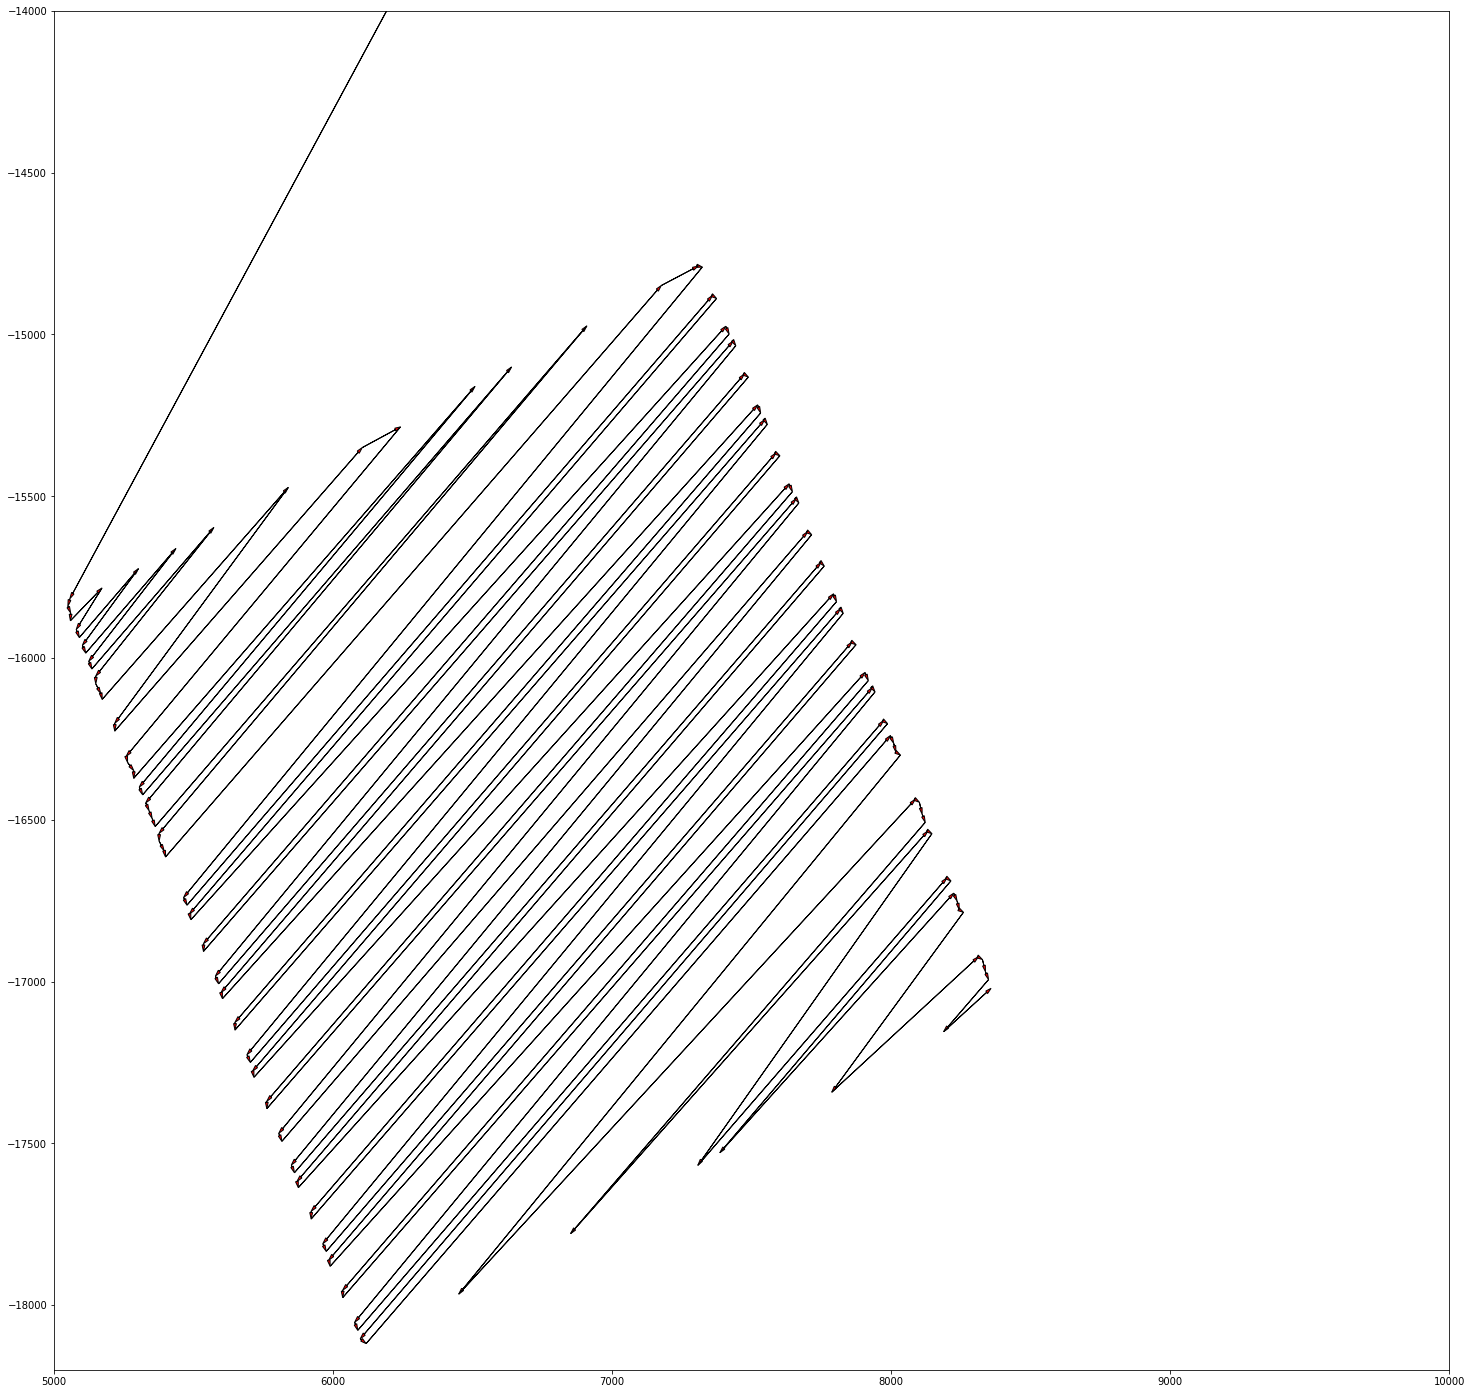

In [90]:
fig, ax = plt.subplots(figsize=(25,25))

for i in range(140):#len(df_non_normal)):   
    x_pos = df_non_normal['x'][i]
    y_pos = df_non_normal['y'][i]
    x_direct = df_non_normal['x_diff'][i]
    y_direct = df_non_normal['y_diff'][i]
    #n = [i for i in df_vector_info_trans_start.new_number]#[:num]

    ax.arrow(x_pos,y_pos,x_direct,y_direct, head_width=10, head_length=20, fc='r', ec='k',length_includes_head = True)
    ax.axis([5000, 10000, -18200, -14000])
    #ax.arrow(1,1,2,2)

    #for i, txt in enumerate(n):
    #        ax.annotate(txt, (x_pos[i], y_pos[i]))
plt.show()

In [5]:
layer_1 = layer(3, "W60_H100")
array = layer_1.array()

array_wo_lasing = layer_1.array_wo_lasing()

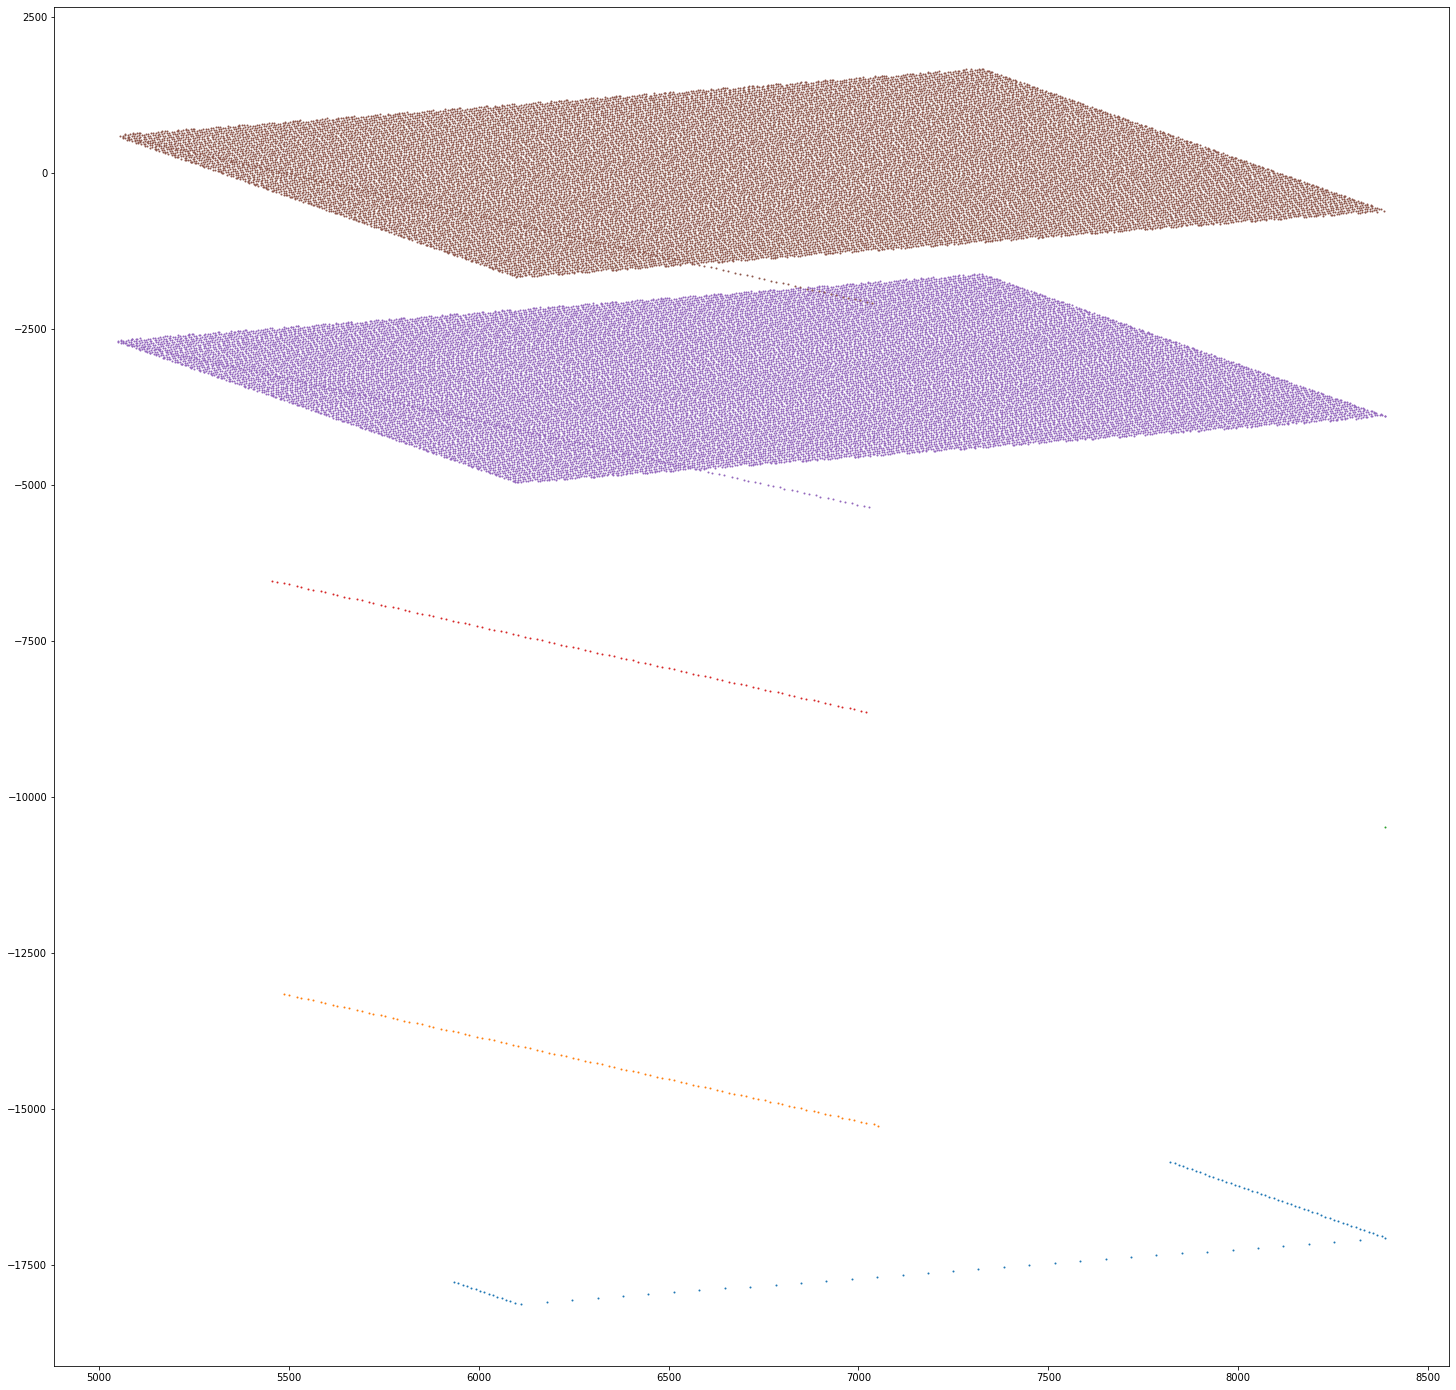

In [45]:
fig, ax = plt.subplots(figsize=(25,25))
 
x_pos = df_vector_info_1['x'][-100:]
y_pos = df_vector_info_1['y'][-100:]
x_direct = df_vector_info_1['x_diff']
y_direct = df_vector_info_1['y_diff']

x_pos2 = df_vector_info_2['x'][:100]
y_pos2 = df_vector_info_2['y'][:100]
x_direct2 = df_vector_info_2['x_diff']
y_direct2 = df_vector_info_2['y_diff']

x_pos3 = df_vector_info_3['x'][-1:]
y_pos3 = df_vector_info_3['y'][-1:]
x_direct3 = df_vector_info_3['x_diff']
y_direct3 = df_vector_info_3['y_diff']

x_pos4 = df_vector_info_4['x'][:100]
y_pos4 = df_vector_info_4['y'][:100]
x_direct4 = df_vector_info_4['x_diff']
y_direct4 = df_vector_info_4['y_diff']

x_pos5 = df_vector_info_5['x']
y_pos5 = df_vector_info_5['y']
x_direct5 = df_vector_info_5['x_diff']
y_direct5 = df_vector_info_5['y_diff']

x_pos6 = df_vector_info_6['x']
y_pos6 = df_vector_info_6['y']
x_direct6 = df_vector_info_6['x_diff']
y_direct6 = df_vector_info_6['y_diff']

ax.scatter(x_pos, y_pos, s=1)
ax.scatter(x_pos2,y_pos2, s=1)
ax.scatter(x_pos3,y_pos3, s=1)
ax.scatter(x_pos4,y_pos4, s=1)
ax.scatter(x_pos5,y_pos5, s=1)
ax.scatter(x_pos6,y_pos6, s=1)

plt.show()

In [ ]:
df_vector_info = pd.DataFrame(columns=['number', 'x', 'y', 'x_end', 'y_end', 'x_diff', 'y_diff', 'length', 'angle'])
